## Build up environment

In [1]:
import requests
import ssl
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.utils as np_utils
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

#define a function called plot_image
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [3]:
'''category and normalize input data for further analyzing'''

#load data and store
ds = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= ds.load_data()
#normalize

x_train_normalize = tf.keras.utils.normalize(x_train)
x_test_normalize = tf.keras.utils.normalize(x_test)

#one hot
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

In [4]:
'''creat CNN model'''

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


#further info of Sequential():
#https://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/
#https://keras-cn.readthedocs.io/en/latest/models/sequential/

model = Sequential()

#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

#MaxPooling size is (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

#filter is 36
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

#平坦化
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

2023-03-31 22:48:04.260463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
'''train model'''

#配置學習過程: compile函數
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#訓練模型: fit函數
train_history=model.fit(x=x_train_normalize, 
                        y=y_trainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)


Epoch 1/20
160/160 - 19s - loss: 0.5932 - accuracy: 0.8115 - val_loss: 0.1252 - val_accuracy: 0.9625 - 19s/epoch - 118ms/step
Epoch 2/20
160/160 - 19s - loss: 0.1667 - accuracy: 0.9501 - val_loss: 0.0791 - val_accuracy: 0.9753 - 19s/epoch - 116ms/step
Epoch 3/20
160/160 - 20s - loss: 0.1185 - accuracy: 0.9650 - val_loss: 0.0593 - val_accuracy: 0.9823 - 20s/epoch - 122ms/step
Epoch 4/20
160/160 - 26s - loss: 0.0958 - accuracy: 0.9714 - val_loss: 0.0491 - val_accuracy: 0.9853 - 26s/epoch - 164ms/step
Epoch 5/20
160/160 - 26s - loss: 0.0824 - accuracy: 0.9753 - val_loss: 0.0460 - val_accuracy: 0.9863 - 26s/epoch - 162ms/step
Epoch 6/20
160/160 - 20s - loss: 0.0711 - accuracy: 0.9785 - val_loss: 0.0428 - val_accuracy: 0.9864 - 20s/epoch - 122ms/step
Epoch 7/20
160/160 - 20s - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.0403 - val_accuracy: 0.9887 - 20s/epoch - 124ms/step
Epoch 8/20
160/160 - 20s - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0375 - val_accuracy: 0.9883 - 20s/epoch - 127

In [6]:
'''predict result'''

#from tensorflow.keras import models
test=x_test_normalize
prediction=np.argmax(model.predict(test),axis=-1)

#print the result
print(prediction[11:30])
print(y_test[11:30])

313/313 [==============================] - 2s 6ms/step
[6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


1/1 [==============================] - 0s 86ms/step
0


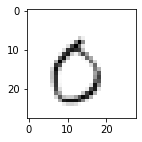

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [7]:
'''predict result, import individual handwrite numbers'''

from matplotlib import image
import PIL
from PIL import Image, ImageOps

#import jpg file of handwrite number
img = Image.open("0.jpg")
#normalize the file to fit training model's input resource
img = img.convert("L")
img = ImageOps.invert(img)
img = img.resize((28,28))
img_np = np.asarray(img)
img_normalize = tf.keras.utils.normalize(img_np)
img_tensor = np.expand_dims(img_normalize,axis=0)
img_tensor = np.expand_dims(img_tensor,axis=3)
#img_tensor = img_tensor.astype("float")/255

#predict the handwrite number and show the result
prediction=np.argmax(model.predict(img_tensor))
print(prediction)
plot_image(img)
print(img_tensor)


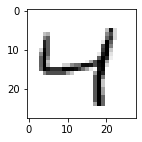

4


In [8]:
plot_image(x_train[2])
print(y_train[2])